<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Data-Mining/blob/main/Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 13.5 MB/s 
     |████████████████████████████████| 3.3 MB 66.5 MB/s 
     |████████████████████████████████| 1.3 MB 37.4 MB/s 
     |████████████████████████████████| 134 kB 43.6 MB/s 
     |████████████████████████████████| 2.0 MB 55.0 MB/s 
     |████████████████████████████████| 88 kB 7.7 MB/s 
     |████████████████████████████████| 25.9 MB 72.0 MB/s 
     |████████████████████████████████| 17.0 MB 52.5 MB/s 
     |████████████████████████████████| 10.4 MB 50.3 MB/s 
     |████████████████████████████████| 636 kB 60.6 MB/s 
     |████████████████████████████████| 1.7 MB 52.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 62.7 MB/s 
     |█████████████████████████████

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
from pycaret.utils import version
version()

'2.3.10'

In [3]:
from pycaret.datasets import get_data
import pandas as pd

In [4]:
file = ('citrus.csv')
  
data = pd.read_csv(file)
  
# displaying the contents of the XLSX file
data.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [5]:
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import jinja2

In [7]:
data.shape

(10000, 6)

In [8]:
data_set = data.sample(frac = 0.90, random_state=786)
data_unseen = data.drop(data_set.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace = True, drop = True)
print("data for modelling "+str(data_set.shape))
print("unseen data for predictions "+str(data_unseen.shape))

data for modelling (9000, 6)
unseen data for predictions (1000, 6)


In [9]:
from pycaret.classification import *
cluster1 = setup(data = data_set, target = 'name', session_id = 123, use_gpu = True)

,Description,Value
0,session_id,123
1,Target,name
2,Target Type,Binary
3,Label Encoded,"grapefruit: 0, orange: 1"
4,Original Data,"(9000, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='name',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [10]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9249,0.9789,0.9291,0.9215,0.9252,0.8498,0.8500,0.081
ridge,Ridge Classifier,0.9249,0.0000,0.9339,0.9175,0.9256,0.8498,0.8501,0.023
lda,Linear Discriminant Analysis,0.9249,0.9789,0.9339,0.9175,0.9256,0.8498,0.8501,0.024
qda,Quadratic Discriminant Analysis,0.9228,0.9770,0.9288,0.9180,0.9233,0.8457,0.8459,0.018
gbc,Gradient Boosting Classifier,0.9227,0.9768,0.9244,0.9213,0.9228,0.8454,0.8455,0.610
nb,Naive Bayes,0.9225,0.9771,0.9285,0.9176,0.9230,0.8451,0.8453,0.017
lightgbm,Light Gradient Boosting Machine,0.9220,0.9754,0.9237,0.9208,0.9222,0.8441,0.8443,0.118
ada,Ada Boost Classifier,0.9201,0.9744,0.9241,0.9171,0.9204,0.8403,0.8405,0.272
et,Extra Trees Classifier,0.9195,0.9731,0.9145,0.9238,0.9191,0.8390,0.8392,1.389
knn,K Neighbors Classifier,0.9192,0.9600,0.9218,0.9171,0.9194,0.8384,0.8385,0.215


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [11]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [12]:
models()

INFO:logs:gpu_param set to True


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9190,0.9811,0.9204,0.9175,0.9189,0.8381,0.8381
1,0.9397,0.9852,0.9363,0.9423,0.9393,0.8794,0.8794
2,0.9095,0.9726,0.9111,0.9082,0.9097,0.8190,0.8191
3,0.9286,0.9790,0.9270,0.9299,0.9285,0.8571,0.8571
4,0.9286,0.9771,0.9238,0.9327,0.9282,0.8571,0.8572
5,0.9286,0.9777,0.9365,0.9219,0.9291,0.8571,0.8573
6,0.9143,0.9738,0.9206,0.9091,0.9148,0.8286,0.8286
7,0.9206,0.9773,0.9460,0.9003,0.9226,0.8413,0.8424
8,0.9429,0.9854,0.9333,0.9515,0.9423,0.8857,0.8859


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [14]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9190,0.9810,0.9204,0.9175,0.9189,0.8381,0.8381
1,0.9397,0.9852,0.9363,0.9423,0.9393,0.8794,0.8794
2,0.9095,0.9727,0.9111,0.9082,0.9097,0.8190,0.8191
3,0.9317,0.9792,0.9333,0.9304,0.9319,0.8635,0.8635
4,0.9286,0.9771,0.9238,0.9327,0.9282,0.8571,0.8572
5,0.9286,0.9777,0.9365,0.9219,0.9291,0.8571,0.8573
6,0.9143,0.9739,0.9206,0.9091,0.9148,0.8286,0.8286
7,0.9206,0.9773,0.9460,0.9003,0.9226,0.8413,0.8424
8,0.9429,0.9854,0.9333,0.9515,0.9423,0.8857,0.8859


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [16]:
print(tuned_lr)

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


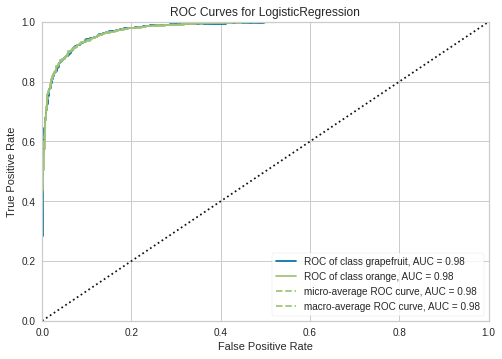

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
plot_model(tuned_lr, plot = 'auc')

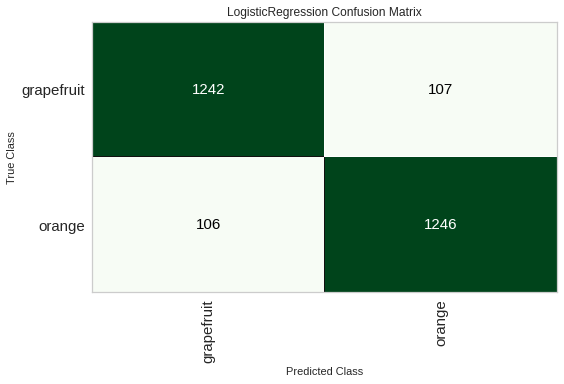

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [18]:
plot_model(tuned_lr, plot = 'confusion_matrix')

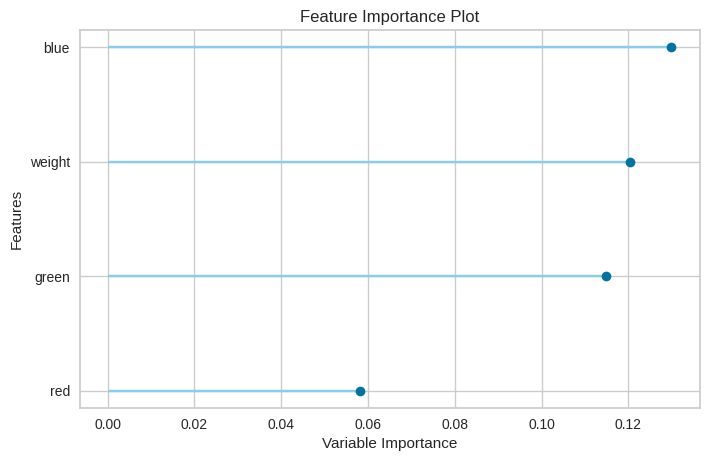

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
plot_model(tuned_lr, plot='feature')

In [20]:
best = automl(optimize = 'Recall')
best

INFO:logs:Initializing automl()
INFO:logs:automl(optimize=Recall, use_holdout=False, return_train_score=False)
INFO:logs:Model Selection Basis : CV Results on Training set
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001), fold=None, round=4, cross_validation=False, predict=False, fit_kwargs=None, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Ridge Classifier Imported succesfully
INFO:logs:Cross val

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

In [21]:
pred_body_perf = predict_model(tuned_lr, data = data_unseen)
pred_body_perf

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0,0.9862,0,0,0,0,0


,name,diameter,weight,red,green,blue,Label,Score
0,orange,4.59,95.86,142,100,2,orange,1.0000
1,orange,4.97,104.01,168,79,22,orange,0.9997
2,orange,5.35,107.01,158,97,2,orange,1.0000
3,orange,5.37,107.64,178,92,7,orange,1.0000
4,orange,5.53,110.40,169,76,3,orange,0.9999
...,...,...,...,...,...,...,...,...
995,grapefruit,14.67,244.78,163,62,2,grapefruit,0.9998
996,grapefruit,14.67,245.14,138,83,26,grapefruit,1.0000
997,grapefruit,14.74,246.21,139,58,15,grapefruit,1.0000
998,grapefruit,14.88,249.58,159,67,11,grapefruit,0.9999


In [22]:
save_model(tuned_lr,'Binary classification Model for Orange/Grapefruit dataset')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Binary classification Model for Orange/Grapefruit dataset, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='name',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strat

FileNotFoundError: ignored

In [33]:
new_prediction = predict_model(tuned_lr, data = data_unseen)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0,0.9862,0,0,0,0,0


,name,diameter,weight,red,green,blue,Label,Score
0,orange,4.59,95.86,142,100,2,orange,1.0000
1,orange,4.97,104.01,168,79,22,orange,0.9997
2,orange,5.35,107.01,158,97,2,orange,1.0000
3,orange,5.37,107.64,178,92,7,orange,1.0000
4,orange,5.53,110.40,169,76,3,orange,0.9999


In [34]:
from pycaret.utils import check_metric
check_metric(new_prediction['name'], new_prediction['Label'], metric = 'Accuracy')

0.941